In [4]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [6]:
ads = pd.read_csv("autos.csv")
ads.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [11]:
fitur_loc = ['price', 'kilometer','monthOfRegistration','brand']
fitur = ['price', 'kilometer','monthOfRegistration']
ads = ads.loc[:100,(fitur_loc)]
X = ads[fitur]
y = ads.brand
display(ads)

,price,kilometer,monthOfRegistration,brand
0,480,150000,0,volkswagen
1,18300,125000,5,audi
2,9800,125000,8,jeep
3,1500,150000,6,volkswagen
4,3600,90000,7,skoda
...,...,...,...,...
96,8390,150000,0,opel
97,3850,150000,5,volkswagen
98,23490,40000,6,bmw
99,6450,150000,12,volkswagen


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.73601797  0.59592323 -1.52622289]
 [ 2.12621141  0.00351923 -0.19964361]
 [ 0.76095048  0.00351923  0.59630395]
 [-0.57218666  0.59592323  0.06567224]
 [-0.2348869  -0.82584637  0.3309881 ]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 2.44744928 -1.06280797  1.65756738]
 [-0.81295444  0.59592323 -0.46495947]
 [-0.4758153   0.59592323  0.59630395]
 [-0.49187719  0.59592323  1.39225152]
 [ 0.29515558 -1.53673117  1.39225152]]
y Training: 80    mercedes_benz
91    mercedes_benz
68            honda
51             fiat
27            honda
Name: brand, dtype: object


In [14]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [15]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['volkswagen' 'volkswagen' 'mercedes_benz' 'volkswagen' 'volkswagen'
 'volkswagen' 'volkswagen' 'volkswagen' 'volkswagen' 'mercedes_benz'
 'mercedes_benz' 'volkswagen' 'volkswagen' 'volkswagen' 'ford'
 'volkswagen' 'volkswagen' 'volkswagen' 'audi' 'audi' 'volkswagen'
 'mercedes_benz' 'volkswagen' 'volkswagen' 'volkswagen' 'volkswagen'
 'volkswagen' 'volkswagen' 'volkswagen' 'ford' 'volkswagen']


Akurasi : 22.58064516129032 %


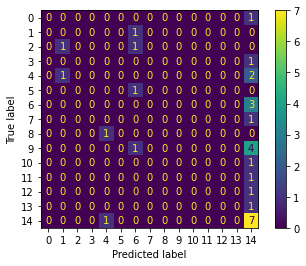

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))